## SMS SPAM MESSAGE  DETECTION

### IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### READING THE DATASET

In [3]:
df = pd.read_csv("C://Users//koner//Downloads//ssdg//spam.csv", encoding='latin1', usecols= ["v1", "v2"])

### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.dtypes

v1    object
v2    object
dtype: object

In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.nunique()

v1       2
v2    5169
dtype: int64

In [12]:
df.sample(5)

,v1,v2
86,ham,For real when u getting on yo? I only need 2 m...
1989,ham,The basket's gettin full so I might be by tonight
5041,spam,Jamster! To get your free wallpaper text HEART...
4287,ham,Hey mr whats the name of that bill brison book...
3443,ham,Yes but I don't care cause I know its there!


### DATA VISUALIZATION

#### BAR CHART

C:\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


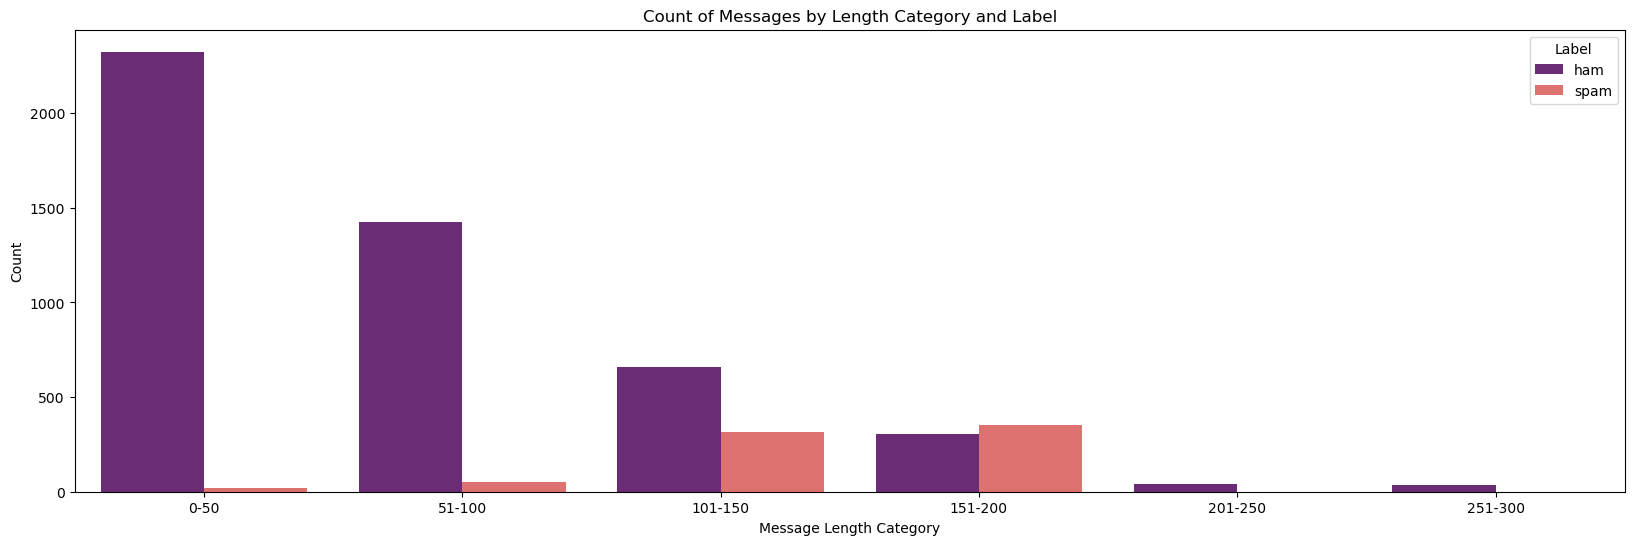

In [13]:
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
df['length_category'] = pd.cut(df['v2'].apply(len), bins=bins, labels=labels)
plt.figure(figsize=(20, 6))
sns.countplot(x='length_category', hue='v1', data=df, palette='magma')  # Change palette to 'magma'
plt.xlabel('Message Length Category')
plt.ylabel('Count')
plt.title('Count of Messages by Length Category and Label')
plt.legend(title='Label')
plt.show()

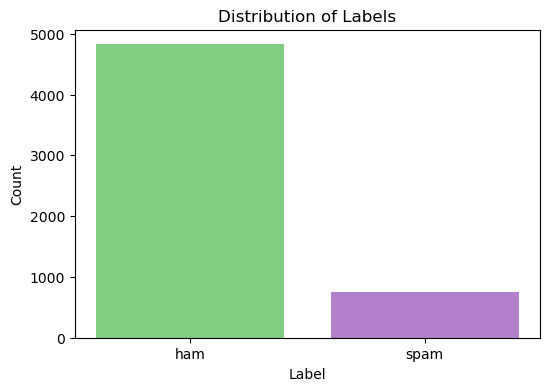

In [14]:
label_counts = df['v1'].value_counts()
light_green = (0.5, 0.8, 0.5)  
light_purple = (0.7, 0.5, 0.8) 
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=[ light_green, light_purple])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

#### HISTOGRAM

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


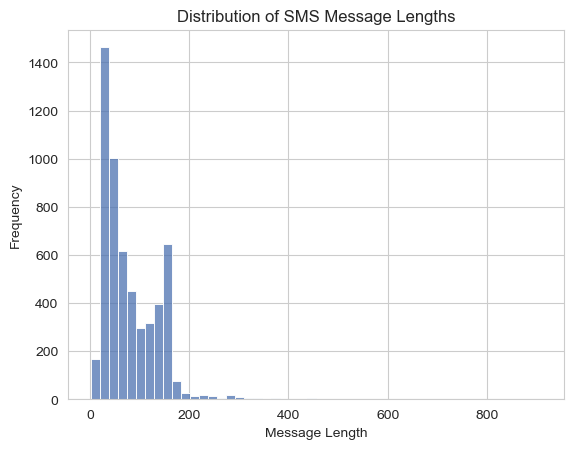

In [15]:
message_lengths = df['v2'].apply(len)
sns.set_style('whitegrid')
sns.set_palette('deep') 
sns.histplot(message_lengths, bins=50, kde=False)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of SMS Message Lengths')
plt.show()

####  WORD CLOUD

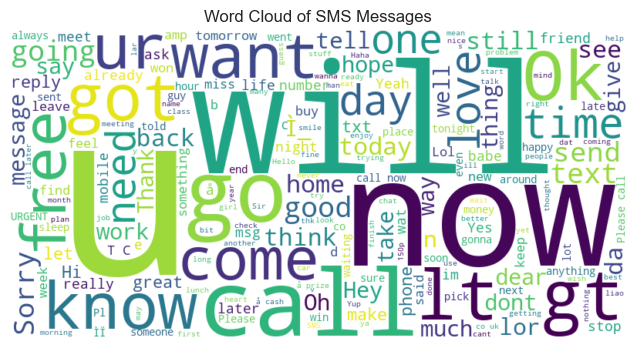

In [16]:
text = ' '.join(df['v2'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(20, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of SMS Messages')
plt.show()

#### PIE CHART

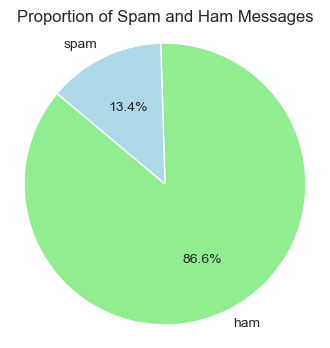

In [17]:
label_proportions = df['v1'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(label_proportions, labels=label_proportions.index, autopct='%1.1f%%', startangle=140,colors=['lightgreen','lightblue'])
plt.axis('equal')
plt.title('Proportion of Spam and Ham Messages')
plt.show()

### DATA PREPROCESSING

In [18]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

### SPLITING DATA FOR TEST AND TRAIN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [20]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### BUILDING MODELS

#### LOGISTIC REGRESSION

In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [22]:
lr_y_pred = lr_model.predict(X_test_tfidf)

In [23]:
lr_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### NAIVE BAYES

In [24]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [25]:
nb_y_pred = nb_model.predict(X_test_tfidf)

In [26]:
nb_y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

#### SUPPORT VECTOR MACHINES (SVM)

In [27]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [28]:
svm_y_pred = svm_model.predict(X_test_tfidf)

In [29]:
svm_y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

### ACCURACIES OF MODELS

In [30]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_accuracy:.2f}")
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(classification_report(y_test, nb_y_pred))

Naive Bayes Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [32]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### COMPARING THE ACCURACIES

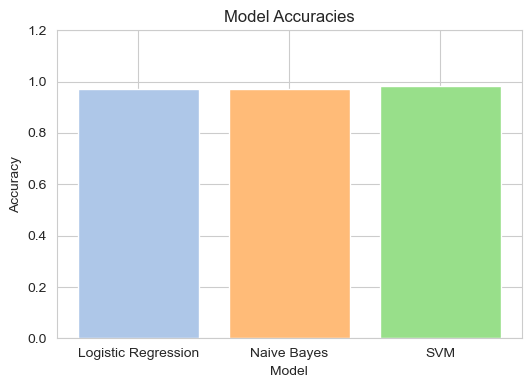

In [33]:
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [lr_accuracy,nb_accuracy,svm_accuracy]
col = ['#aec7e8', '#ffbb78', '#98df8a'] 
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=col)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.2)
plt.show()

### CONFUSION MATRIX

#### LOGISTIC REGRESSION

In [34]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[963,   2],
       [ 29, 121]], dtype=int64)

#### NAIVE BAYES

In [35]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[963,   2],
       [ 29, 121]], dtype=int64)

#### SUPPORT VECTOR MACHINE

In [36]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
svm_cm

array([[963,   2],
       [ 19, 131]], dtype=int64)

### VISUALIZATION OF CONFUSION MATRIX

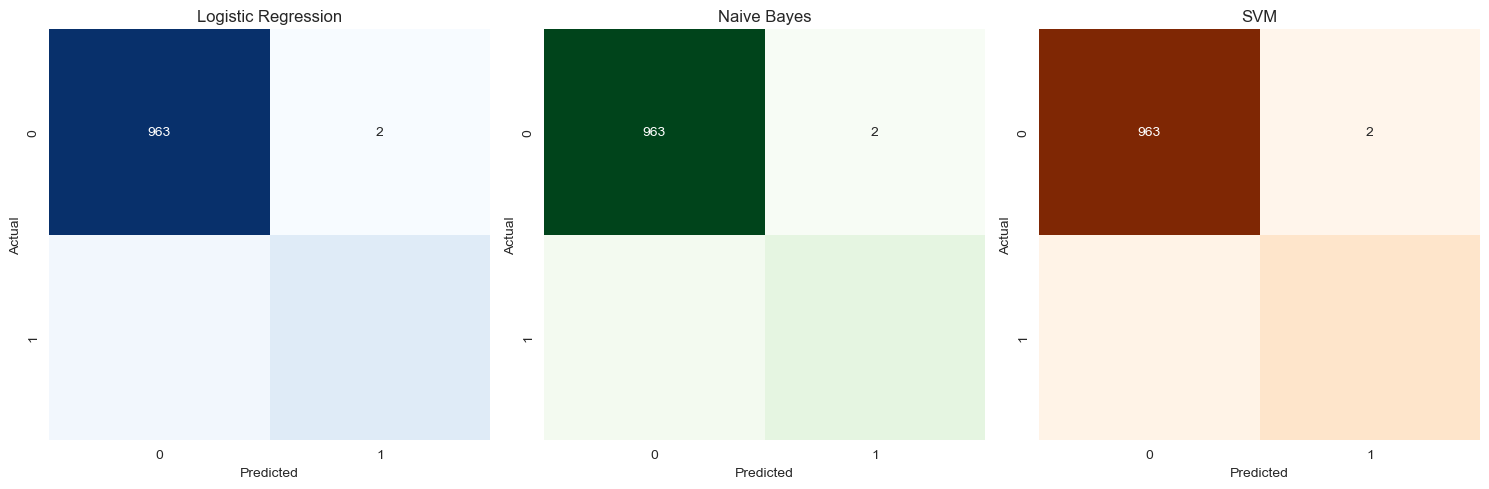

In [37]:
colors = ["Blues", "Greens", "Oranges"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(lr_cm, annot=True, fmt="d", cmap=colors[0], cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(nb_cm, annot=True, fmt="d", cmap=colors[1], cbar=False, ax=axes[1])
axes[1].set_title('Naive Bayes')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(svm_cm, annot=True, fmt="d", cmap=colors[2], cbar=False, ax=axes[2])
axes[2].set_title('SVM')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### PREDICTION

#### Here SVM have the highest accuracy so we using it in prediction

In [38]:
def pred(message):
    message_tfidf = vectorizer.transform([message])
    prediction = svm_model.predict(message_tfidf)
    return 'spam' if prediction[0] == 1 else 'ham'

In [40]:
message = input("Enter a SMS message: ")
result = pred(message)
print(f"Message: {message}")
print(f"Predicted Label: {result}")

Enter a SMS message:  hi


Message: hi
Predicted Label: ham


In [41]:
message = input("Enter a SMS message: ")
result = pred(message)
print(f"Message: {message}")
print(f"Predicted Label: {result}")

Enter a SMS message:  hello there! how are you doing?


Message: hello there! how are you doing?
Predicted Label: ham
